In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load in dataframes

In [2]:
# categorical variable train dataframe

file_path_trainC = "widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.csv"
train_cat = pd.read_csv(file_path_trainC)
train_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [3]:
train_cat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [4]:
# Functional Connectome Matrices

file_path_trainFCM = "widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv"
train_FCM = pd.read_csv(file_path_trainFCM)
train_FCM.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [5]:
train_FCM.columns

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19901)

In [6]:
# Quantitative varaible train dataframe

file_path_trainQ = "widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.csv"
train_Quant = pd.read_csv(file_path_trainQ)
train_Quant.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [7]:
train_Quant.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

In [8]:
# ADHD and Sex solutions dataframe for model training

file_path_trainS = "widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.csv"
train_Solutions = pd.read_csv(file_path_trainS)
train_Solutions.drop(columns = ['Unnamed: 3', 'Unnamed: 4'], inplace = True)
train_Solutions.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [9]:
train_Solutions.columns

Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a way to understand your dataset by looking at its patterns, trends, and relationships. It helps identify missing data, outliers, and how variables interact.

Use `.info()` and `.describe()` to summarize each dataset.

train_cat.info()

Understand the distribution of the categorical variables with `.value_counts()`.

#Barratt_Barratt_P2_Occ - Barratt Simplified Measure of Social Status - Parent 2 Occupation
train_cat['Barratt_Barratt_P2_Occ'].value_counts()

#Look back at the dictionary on Kaggle!
# to see what category these integers [0, 45, 35...] represent.

Visualize distributions:

sns.countplot(x='Barratt_Barratt_P2_Occ', data = train_cat[['Barratt_Barratt_P2_Occ']])
plt.title(f"Distribution of Barratt_Barratt_P2_Occ")
plt.xticks(rotation=45)
plt.show()

Understand the distribution of quantitative variables.

# Distribution of MRI_Track_Age_at_Scan
train_Quant['MRI_Track_Age_at_Scan'].hist(figsize=(8, 6), bins=20)
plt.suptitle("MRI_Track_Age_at_Scan Distributions")
plt.xlabel('MRI_Track_Age_at_Scan')
plt.ylabel('Frequency Count')
plt.show()


The train_Solutions dataset contains labels for `ADHD` and `gender`. Let's examine the class distribution.

# ADHD distribution
train_Solutions['ADHD_Outcome'].value_counts()

train_Solutions['ADHD_Outcome'].value_counts().plot(kind='bar')
plt.title('ADHD Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Gender distribution
train_Solutions['Sex_F'].value_counts()

 ## **Key Insight**: Gender imbalance in the dataset may introduce bias in modeling. Address this during data preparation.

train_Solutions['Sex_F'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

### How to Test Predictiveness:

##### **Quantitative Data**: Use histograms or boxplots to visualize distributions of quantitative (e.g., Color vision test score)

train_Quant.columns

Let's look at the `SDQ_SDQ_Emotional_Problems`, which indicates Emotional Problems Scale.

# Plot the distribution of the SDQ_SDQ_Emotional_Problems variable
plt.figure(figsize=(8, 6))
sns.histplot(train_Quant['SDQ_SDQ_Emotional_Problems'], kde=True, color='skyblue')
plt.title('Distribution of SDQ_SDQ_Emotional_Problems')
plt.xlabel('SDQ_SDQ_Emotional_Problems')
plt.ylabel('Frequency')
plt.show()

This boxplot examines the relationship between `SDQ_SDQ_Emotional_Problems` and `ADHD_outcome` (as a target variable).

# Check for correlation with ADHD outcome
train_Quant_copy = train_Quant.copy()
train_Quant_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Emotional_Problems', data=train_Quant_copy)
plt.title('SDQ_SDQ_Emotional_Problems vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('SDQ_SDQ_Emotional_Problems')
plt.show()


The boxplot reveals that individuals diagnosed with ADHD tend to have a higher median on the SDQ Emotional Problems scale compared to non-ADHD individuals. Additionally, the boxplot for the ADHD group displays greater variability, as evidenced by its extended range. This suggests that emotional problems are not only more pronounced but also more diverse within the ADHD group.

##### **Categorical Data**: Use bar plots to compare groups (e.g., ADHD rates by Parent 1 occupation).


train_cat.columns

Let's look at `Barratt_Barratt_P1_Edu` which indicates the Parent 1 level of education

- 3=Less than 7th grade
- 6=Junior high/Middle school (9th grade)
- 9=Partial high school (10th or 11th grade)
- 12=High school graduate
- 15=Partial college (at least one year)
- 18=College education
- 21=Graduate degree

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train_cat, x='Barratt_Barratt_P1_Edu', hue=train_Solutions['ADHD_Outcome'])
plt.title('ADHD Prevalence by Parent 1 Education')
plt.show()

train_cat['Barratt_Barratt_P1_Edu'].value_counts()

Most of the data points fall into a specific category (e.g., 21 has 470 entries out of a total 1213). This means that even if ADHD prevalence appears higher in this category, it might just reflect that there are more people in this group overall, rather than an actual trend.

To adress this, normalize the data or compute percentages within each category to account for differences in group sizes. Let's compute ADHD percentage for each category.

# Add ADHD_Outcome directly to a copy of the train_cat dataset for grouping
train_cat_copy = train_cat.copy()
train_cat_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

adhd_percentages = train_cat_copy.groupby('Barratt_Barratt_P1_Edu')['ADHD_Outcome'].mean()
print(adhd_percentages)

Categories like 3 - Less than 7th grade (80%) and 12 - High school graduate (72%) show some of the highest proportions of ADHD outcomes. Categories 21 - Graduate degree (67.2%) have relatively lower ADHD proportions compared to middle education levels.

train_cat['Barratt_Barratt_P1_Edu'].value_counts()

While these proportions might appear noteworthy, it is essential to consider the smaller sample size for lower education levels. **Smaller sample sizes can lead to greater variability** and make the proportions more susceptible to outliers. This means that a few individual cases can disproportionately affect the results, making them less reliable and less representative of the broader population. Therefore, it is crucial to examine sample sizes carefully before drawing any conclusions.

## Pre-processed Categorical Columns


Our categorical columns include demographic data about the adolescent and parental information, such as occupation and education level.

In the provided dataset, these categorical columns have been preprocessed by assigning numerical values to the categories within each variable. For instance, in the Parent 1 Occupation column, the number 35 might represent roles such as nurse, skilled technician, medical technician, or counselor. This grouping reduces the number of unique responses for each variable, simplifying the dataset.

The integers currently representing categorical values can be cross-referenced in the provided data dictionary in [kaggle](https://www.kaggle.com/competitions/widsdatathon2025/data) to understand their corresponding categories.


## What does One - Hot Encoding do ?

One hot encoding creates a new binary column for each unique category within a variable. For example, in the Parent 1 Occupation column with 10 possible categories (e.g., 0, 5, 10, 15, 20, etc.), one-hot encoding will generate 10 new columns: Parent_1_Occupation_0, Parent_1_Occupation_5, Parent_1_Occupation_10, and so on.

Each of these new columns will contain boolean values (True or False). For instance, if a participant's parent 1 occupation falls into category 0, the Parent_1_Occupation_0 column will have a value of True, while the other columns for this variable will be False. The same logic applies to the other categories, ensuring each participant is appropriately represented in the dataset.


# Why use one hot encoding

Avoid Implying Ordinal Relationships


1.  If you encode categories using numbers directly (e.g., 0, 1, 2), the algorithm might interpret these numbers as having a meaningful order or scale, which could lead to incorrect assumptions.
2.  One-hot encoding eliminates this problem by assigning each category its own binary column, ensuring no ordinal relationship is implied.


Improve Algorithm Performance


*  Algorithms like logistic regression, decision trees, and neural networks often perform better with one-hot encoded data because it provides clear distinctions between categories.
*  Without one-hot encoding, algorithms might struggle to learn from categorical variables or produce biased results.





One hot encoding is only possible on categorical variables so the first step is to switch our integer representations into category type variables.

In [10]:
train_cat = pd.read_csv(file_path_trainC)

for col in train_cat.select_dtypes(include='number').columns:
    train_cat[col] = train_cat[col].astype('Int64')
    train_cat[col] = train_cat[col].astype('category')

Our first column of our dataset is our participant id. This is an indicator variable that identifies each patient. This column is very important as it will be the one used to merge all of our data frames together, but, we do not want to encode this column. So, we will create a list of all the columns except the first one and label those `columns_to_encode`.

In [11]:
# Creating a list of all of the columns except the first
columns_to_encode = train_cat.columns[1:].tolist()

# Print the columns to encode
print("Columns to encode:", columns_to_encode)

Columns to encode: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


`pd.get_dummies(train_cat[columns_to_enccode], drop_first=True)`:
* Converts selected categorical columns in train_cat into one-hot encoded columns creating binary (0 or 1) columns for each category.
* The `drop_first=True` parameter avoids the "dummy variable trap" by dropping the first category for each feature,reducing redundancy in the encoded data.

`data_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))`:

*   Iterates over every element in the data_encoded DataFrame and:
  - Converts `True` to 1 and `False` to 0.
  - Leaves all other values unchanged.

In [12]:
# encoding categorical data
data_encoded = pd.get_dummies(train_cat[columns_to_encode], drop_first=True)
data_encoded = data_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

Reintroducing participant ID after encoding:

After encoding the categorical columns we will add back in the participant id column. The get dummies function will align the participants correctly with their respective feature variables because it respects the original index of the DataFrame, so row alignment is consistent. When concatenating `data_encoded` with the rest of the DataFrame `train_cat.drop(columns=columns_to_encode)`, the rows align because pandas automatically matches by index.

In [13]:
# Combine encoded columns with the rest of the DataFrame
cat_train_final = pd.concat([train_cat.drop(columns=columns_to_encode), data_encoded], axis=1)

# ensure it looks correct
print(cat_train_final.shape)
cat_train_final.head()

(1213, 57)


,participant_id,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_1,...,Barratt_Barratt_P2_Edu_21,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,UmrK0vMLopoR,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,CPaeQkhcjg7d,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Nb4EetVPm3gs,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,p4vPhVu91o4b,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M09PXs7arQ5E,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# TESTING ZONE !

combine training and testing dataframes with categorical data in order to one hot encode them with all possible values

In [14]:
train_cat = pd.read_csv(file_path_trainC)

train_shape = train_cat.shape

for col in train_cat.select_dtypes(include='number').columns:
    train_cat[col] = train_cat[col].astype('Int64')
    train_cat[col] = train_cat[col].astype('category')
    
file_path_testC = "widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx"

test_cat = pd.read_excel(file_path_testC)

for col in test_cat.select_dtypes(include='number').columns:
    test_cat[col] = test_cat[col].astype('Int64')
    test_cat[col] = test_cat[col].astype('category')
    
cat_train_test = pd.concat([train_cat, test_cat], axis = 0).reset_index(drop = True)
cat_train_test


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0,1,3,15,20,0,0
...,...,...,...,...,...,...,...,...,...,...
1512,UadZfjdEg7eG,2023,4,0,0,4,18,0,18,35
1513,IUEHiLmQAqCi,2023,4,0,1,3,18,35,21,40
1514,cRySmCadYFRO,2023,4,0,8,4,21,25,15,NaN
1515,E3MvDUtJadc5,2022,4,0,8,4,21,0,21,45


In [15]:
columns_to_encode = cat_train_test.columns[1:].tolist()
cat_train_test_final = cat_train_test.drop(columns = columns_to_encode)

for col in cat_train_test.columns[1:]:
    encoded = pd.get_dummies(cat_train_test[col], prefix = col)
    cat_train_test_final = pd.concat([cat_train_test_final, encoded], axis = 1)

cat_train_test_final

,participant_id,Basic_Demos_Enroll_Year_2015,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Enroll_Year_2021,Basic_Demos_Enroll_Year_2022,Basic_Demos_Enroll_Year_2023,...,Barratt_Barratt_P2_Occ_0,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,UmrK0vMLopoR,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,CPaeQkhcjg7d,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Nb4EetVPm3gs,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,p4vPhVu91o4b,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,M09PXs7arQ5E,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,UadZfjdEg7eG,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1513,IUEHiLmQAqCi,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1514,cRySmCadYFRO,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1515,E3MvDUtJadc5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
cat_train_final = cat_train_test_final.iloc[:1213]
cat_train_final.head()

,participant_id,Basic_Demos_Enroll_Year_2015,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Enroll_Year_2021,Basic_Demos_Enroll_Year_2022,Basic_Demos_Enroll_Year_2023,...,Barratt_Barratt_P2_Occ_0,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,UmrK0vMLopoR,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,CPaeQkhcjg7d,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Nb4EetVPm3gs,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,p4vPhVu91o4b,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,M09PXs7arQ5E,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
cat_test_final = cat_train_test_final.iloc[1213:].reset_index(drop = True)
cat_test_final.head()

,participant_id,Basic_Demos_Enroll_Year_2015,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Enroll_Year_2021,Basic_Demos_Enroll_Year_2022,Basic_Demos_Enroll_Year_2023,...,Barratt_Barratt_P2_Occ_0,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,Cfwaf5FX7jWK,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,vhGrzmvA3Hjq,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,ULliyEXjy4OV,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,LZfeAb1xMtql,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,EnFOUv0YK1RG,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Train and Test Dataframes

For any machine learning model you need training data and test data. On our Kaggle data page, you'll find both the training and testing dataframes. We have just encoded the categorical dataframe for our training data. Now, we need to apply the same encoding steps to the categorical dataframe in the testing data. It's essential to ensure that any preprocessing done on the training data is also applied to the test data to ensure accurate model predictions.

Our test categorical dataframe is preprocessed the same way as our training data so we will follow the same steps to encode the dataframe.

# load in test categorical dataframe

file_path_testC = "widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx"
test_cat = pd.read_excel(file_path_testC)
# test_cat.head()

# convert our int variables to categories
for col in test_cat.select_dtypes(include='number').columns:
    test_cat[col] = test_cat[col].astype('Int64')
    test_cat[col] = test_cat[col].astype('category')
    
# Creating a list of all of the columns except the first
columns_to_encode = test_cat.columns[1:].tolist()

# Print the columns to encode
print("Columns to encode:", columns_to_encode)

# encoding categorical data
data_encoded = pd.get_dummies(test_cat[columns_to_encode], drop_first=True)
data_encoded = data_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Combine encoded columns with the rest of the DataFrame
cat_test_final = pd.concat([test_cat.drop(columns=columns_to_encode), data_encoded], axis=1)

print(cat_test_final.shape)
cat_test_final.head()

## Merging Data Frames

Now we have categorical data frames for both our training and test datasets that are both ready to be merged with our remaining variables, the functional connectome matrices and quantitative data. The result of merging will be two final dataframes, train df and test df.

All the dataframes include a participant_id variable, which serves as the unique identifier for each patient. This variable will be used to merge the dataframes, as it is the only common variable across the datasets.

The pandas merge function can only merge two dataframes. So, I will first merge our encoded train categorical dataframe with our training functional connectome matrices. Then I will combine that merged data frame with our training quantitative dataframe. Again, this will all be executed using the pandas merge function on our participant id variable.

In [18]:
train_cat_FCM = pd.merge(cat_train_final, train_FCM, on = 'participant_id')

In [19]:
train_df = pd.merge(train_cat_FCM, train_Quant, on = 'participant_id')

# ensure it looks accurate
print(train_df.shape)
train_df.head()

(1213, 19988)


,participant_id,Basic_Demos_Enroll_Year_2015,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Enroll_Year_2021,Basic_Demos_Enroll_Year_2022,Basic_Demos_Enroll_Year_2023,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,0,1,0,0,0,0,0,0,0,...,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,0,0,0,0,1,0,0,0,0,...,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,0,1,0,0,0,0,0,0,0,...,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,0,0,0,1,0,0,0,0,0,...,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0,0,0,0,1,0,0,0,0,...,1,18,4,11,4,10,7,3,9,8.940679



This creates an almost complete train dataframe. You may have noticed that there is one dataframe left in our training data that we have not merged, the solutions. When training a machine learning model you have an `X_train ` dataframe containing the feature variables and a `Y_train` dataframe containing the target variables. We just created our `X_train` dataframe. In our third workshop we will cover how to use the `X_train` and `Y_train` dataframes to train the model.

Our testing data does not contain solutions, since that is what you will produce when running your model. So we just need one feature variable dataframe.

We will merge together the feature variables for our testing data, the same way we did for our training data. First, I will load in the quantative and functional connectome matrices.


## Merge test dataframes

In [20]:
file_path_testFCM = "widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv"
test_FCM = pd.read_csv(file_path_testFCM)
# print(train_FCM.head())

file_path_testQ = "widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx"
test_Quant = pd.read_excel(file_path_testQ)
# print(train_Quant.head())

test_cat_FCM = pd.merge(cat_test_final, test_FCM, on = 'participant_id')

test_df = pd.merge(test_cat_FCM, test_Quant, on = 'participant_id')

# ensure it looks accurate
print(test_df.shape)
test_df.head()

(304, 19988)


,participant_id,Basic_Demos_Enroll_Year_2015,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Enroll_Year_2021,Basic_Demos_Enroll_Year_2022,Basic_Demos_Enroll_Year_2023,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,0,0,0,0,0,0,0,1,0,...,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,0,0,0,0,0,0,0,0,1,...,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,0,0,0,0,0,0,0,1,0,...,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,0,0,0,0,0,0,0,1,0,...,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,0,0,0,0,0,0,0,1,0,...,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


Now we have nearly complete train and test dataframes. There is one more step before we can perform machine learning, imputing NA values. Again, you will need to impute NA values the same way for both your training and test dataframes for accurate model performance.

# the below might be wrong somehow bc child ethnicity should have been one hot encoded, meaning that column shouldnt exist as a singular one

## ok well it doesnt exist now but still. this interpretation hasnt been nan-filled as it should, the one hot encoding got weird

## NA values

Before performing machine learning we must adress missing values to ensure optimal model performance.

We will demonstrate how to fill the missing (`NA`) values using the mean of each column as an example.

Note: There are many approaches to handle missing values, and the best method often depends on your dataset and chosen machine learning model. You can explore how your model deals with missing data and try alternative techniques. For example, this [website](https://www.widsworldwide.org/get-inspired/blog/a-data-scientists-deep-dive-into-the-wids-datathon/) has various ways to handle missing data.

Filling NA values is a key challenge in this datathon to get accurate model performance. Experiment with different methods and evaluate which approach gives the best results for your model!

In [21]:
# check how many NA values we have
print(train_df.isna().sum())

# 371 NANs values
# 360 in MRI_Track_age_at_Scan
# 11 in PreInt_Demos_Fam_Child_Ethnicity

participant_id                    0
Basic_Demos_Enroll_Year_2015      0
Basic_Demos_Enroll_Year_2016      0
Basic_Demos_Enroll_Year_2017      0
Basic_Demos_Enroll_Year_2018      0
                               ... 
SDQ_SDQ_Hyperactivity             0
SDQ_SDQ_Internalizing             0
SDQ_SDQ_Peer_Problems             0
SDQ_SDQ_Prosocial                 0
MRI_Track_Age_at_Scan           360
Length: 19988, dtype: int64


We can fill the missing (`NA`) values in the columns `MRI_Track_Age_at_Scan` and `PreInt_Demos_Fam_Child_Ethnicity` individually by replacing them with the mean of their respective columns.

In [22]:
train_df.fillna({'MRI_Track_Age_at_Scan':train_df['MRI_Track_Age_at_Scan'].mean()}, inplace = True)
# train_df.fillna({'PreInt_Demos_Fam_Child_Ethnicity':train_df['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace = True)

print(train_df.isna().sum().sum()) # should now be zero

0


We can also use backward and forward fills. This indicates using previous or the following data row in order to replace the missing values.


In [23]:
train_df.ffill(inplace=True)
print(train_df.isna().sum().sum())

0


Now that we have filled in our NA values our data frame is ready to be trained for machine learning. Tune into our next workshop to understand how to build your mulitoutcome machine learning model!

#Perform Machine Learning

## Multi-Outcome Model

A machine learning model is a mathematical model that, after being trained on a dataset, can make predictions or classifications on new data by identifying patterns within the information.

Since this challenge is trying to answer the question:

What brain activity patterns are associated with ADHD; are they different between males and females, and, if so, how?

Our predictions or target variables in this model are gender (1 = female, 0 = male) and ADHD diagnosis (1 = has ADHD, 0 = does not). Both are classification problems, meaning the outputs are binary: each prediction will either be 0 or 1, representing a boolean result.

To predict both target variables simultaneously, we will use a multi-outcome machine learning model. This type of model is designed to predict multiple dependent variables (or outcomes) at the same time, rather than one at a time. For this task, our Y_train dataset will include two target columns—gender and ADHD diagnosis. The predictions generated by your model, which you will submit to Kaggle, will also include these two variables. As a requirement for this challenge, you must use a multi-outcome model to produce predictions for both targets simultaneously.


## Why use a Multi-Outcome model ?

This approach is particularly relevant to our specific challenge of investigating ADHD diagnosis in women. Research suggests that women with ADHD are often underdiagnosed, and by modeling gender and ADHD diagnosis together, we can explore potential relationships between these variables. Using the same feature variables to predict both targets allows us to examine this connection in a systematic way. A multi-outcome model is ideal for this purpose because it efficiently handles the simultaneous prediction of both variables while leveraging any potential interdependencies between them.

Additionally, using a multi-outcome model streamlines the workflow. We only need to preprocess the data once, and we can train a single model instead of separate models for each target. This not only saves time and computational resources but also simplifies the overall process, making it easier to maintain consistency across predictions for gender and ADHD diagnosis.


## X Train and Y Train

For any machine learning model, you need an X_train dataset, which contains the feature variables used to make predictions about the target variables—in this case, ADHD diagnosis and gender. Our feature variables include categorical columns, quantitative variables, and functional connectome matrices. We have prepared our X_train dataframe by encoding categorical variables, merging dataframes, and handling missing values by filling in NAs.

In addition to X_train, we also need Y_train, the dataset containing the target variables, to train the model. The target variables allow the model to learn the patterns in the feature variables that lead to specific outcomes for ADHD diagnosis and gender. This relationship is what enables the model to make accurate predictions when applied to new data.

So the first step we will take in coding is loading in the training solutions dataframe this will be our Y_train.


In [24]:
# widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
file_path_trainS = "widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.csv"
train_Solutions = pd.read_csv(file_path_trainS)

Both our X_train and Y_train datasets include the participant_id column, which serves as an identifier for each patient. Since this column is of type category and machine learning models require numerical data (int or float), it cannot be used during training. Additionally, it is not relevant for model learning. Therefore, we will remove the participant_id column from both dataframes before training the machine learning model.

In [25]:
X_train = train_df.drop(columns = ['participant_id'])
Y_train = train_Solutions.drop(columns = ['participant_id', 'Unnamed: 3', 'Unnamed: 4'])

### XGBoost

XGBoost, short for eXtreme Gradient Boosting, is an optimized implementation of gradient boosting, a machine learning technique that builds an ensemble of decision trees to make predictions. It is widely used for structured (tabular) data and is especially popular in competitive data science (e.g., Kaggle competitions) due to its high performance, speed, and flexibility.

XGBoost builds an ensemble of decision trees in a sequential manner, where each tree corrects the errors of the previous ones. The final prediction is the weighted sum of the predictions from all trees.

Gradient Boosting:

Each tree tries to minimize the error (residual) from the previous step by fitting to the gradient of the loss function.
This iterative process improves the model's accuracy over time.
Ensemble Learning:

By combining multiple weak learners (shallow decision trees), XGBoost creates a strong predictive model.

First we must create an instance of the XGBClassifier from the xgboost library.

Key Parameters Explained:


*   objective='binary:logistic': Specifies the task type as binary classification, with logistic regression as the objective function.
*   n_estimators=100: Sets the number of boosting rounds (i.e., the number of trees to train in the ensemble).
* learning_rate=0.1: Determines the step size shrinkage used to prevent overfitting. Lower values result in slower learning but can improve accuracy.
* max_depth=5: Limits the depth of each decision tree to prevent overfitting while ensuring the model captures enough complexity.

In [26]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

# Initialize the base classifier
xgb_classifier = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=5)

Next, we will wrap the XGBClassifier with MultiOutputClassifier, a utility from sklearn that enables the model to handle multi-target classification.

Why it's needed:
XGBClassifier on its own can only handle single-target classification. MultiOutputClassifier manages the training process by creating a separate XGBClassifier for each target variable in y_train.

In [27]:
# Wrap with MultiOutputClassifier for multi-target classification
multioutput_classifier = MultiOutputClassifier(xgb_classifier)

Next, we must train the multioutput_classifier on the feature matrix X_train and the multi-target labels y_train.

How it works:

MultiOutputClassifier internally splits y_train into individual target columns.
For each target column, it trains a separate instance of the XGBClassifier using the features from X_train.

In [28]:
# Train the model
multioutput_classifier.fit(X_train, Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                   

## Testing the Model

Once we have a trained model we can start testing our model and making our predictions! We also preprocessed our testing data the same way we did our training data so we are all ready to use our test_df as our x_test dataframe in our trained model.

Participant_id: we will remove this column because it is type category and not helpful in machine learning but we will store it in a variable to save it to concat back to our dataframe later before submitting your predicitions

In [30]:
participant_id = test_df['participant_id']


X_test = test_df.drop(columns = 'participant_id')

y_pred = multioutput_classifier.predict(X_test)

Now we can create a dataframe of the participant ids that we stored and our predicted values

In [31]:
# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(
    y_pred,
    columns=['Predicted_Gender', 'Predicted_ADHD']
)

# Combine participant IDs with predictions
result_df = pd.concat([participant_id.reset_index(drop=True), predictions_df], axis=1)

# Print or save the DataFrame
print(result_df)

    participant_id  Predicted_Gender  Predicted_ADHD
0     Cfwaf5FX7jWK                 0               0
1     vhGrzmvA3Hjq                 1               0
2     ULliyEXjy4OV                 1               0
3     LZfeAb1xMtql                 0               0
4     EnFOUv0YK1RG                 1               0
..             ...               ...             ...
299   UadZfjdEg7eG                 0               0
300   IUEHiLmQAqCi                 1               1
301   cRySmCadYFRO                 0               0
302   E3MvDUtJadc5                 0               0
303   dQJXfyRazknD                 1               0

[304 rows x 3 columns]


Example of an expected result that you will submit to kaggle:

    participant_id  Predicted_Gender  Predicted_ADHD
0     Cfwaf5FX7jWK                 0               0
1     vhGrzmvA3Hjq                 1               0
2     ULliyEXjy4OV                 1               0
3     LZfeAb1xMtql                 0               0
4     EnFOUv0YK1RG                 1               0
..             ...               ...             ...
299   UadZfjdEg7eG                 0               0
300   IUEHiLmQAqCi                 1               1
301   cRySmCadYFRO                 0               0
302   E3MvDUtJadc5                 0               0
303   dQJXfyRazknD                 1               0

### Evaluating Machine Learning Model - Cross Validation Score

The cross-validation score is a metric used to evaluate the performance of a machine learning model by testing it on multiple subsets of the data. It provides an estimate of how well the model is likely to generalize to unseen data.

How Cross-Validation Works:


*   The dataset is divided into 𝑘 equally-sized subsets or folds.
*   The model is trained on k - 1 folds (the training set) and evaluated on the remaining fold (the validation set)
* This process is repeated k times, with each fold being used once as the validation set
* The evaluation metric, we will use accuracy is computed for each iteration

Why are we using cross-validation score:


*  Since we don’t have the true labels for the test data, we cannot calculate the actual accuracy score. Cross-validation provides a reliable way to evaluate our model's performance using the training data without needing the test set answers.
*  Cross-validation ensures that a model is evaluated on multiple subsets of the data

Import the necessary libraries: We will be using the sklearn library in python to perform cross validation

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

Define a custom accuracy metric for multi-output classification, where each target variable (column) needs a separate accuracy calculation.

This function will:


*   Converts y_true and y_pred into NumPy arrays to enable indexing like `[:, i].`
*   Iterates over each column (i.e., target variable) in y_true and y_pred.
* Computes the accuracy score for each target variable using accuracy_score.
* Returns the average accuracy across all target variables.

In [33]:
def multi_output_accuracy(y_true, y_pred):
    # Ensure y_true and y_pred are NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Compute accuracy for each target variable and return the mean
    return np.mean([accuracy_score(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])

Then we will wrap the multi_output_accuracy function into a scorer object that can be used with scikit-learn's evaluation tools (e.g., cross_val_score). This will automatically create the `y_true` and `y_pred` being used in our function above.

In [34]:
# Create a scorer using scikit-learn's make_scorer
multi_output_scorer = make_scorer(multi_output_accuracy)

Now we will actually perform cross validation with our multi-outcome machine learning model while using our X_train and Y_train dataframes.

*   `cv=5`: Specifies 5-fold cross-validation so it will split X_train and Y_train into 5 subsets. Train the model on 4 folds and evaluates it on the remaining fold. Then, repeat this process 5 times, with each fold being used as the validation set once.
*   `scoring = multi_output_scorer`: Uses the custom scoring function for evaluation.

In [35]:
# Perform cross-validation on the training data
cv_scores = cross_val_score(multioutput_classifier, X_train, Y_train, cv = 5, scoring = multi_output_scorer)

# Output the cross-validation results
print("Cross-validation scores for each fold:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

# Cross-validation scores for each fold: [0.82304527 0.78600823 0.69341564 0.64669421 0.33471074]
# Mean CV score: 0.6567748188960311

Cross-validation scores for each fold: [0.82304527 0.78600823 0.69341564 0.64669421 0.33471074]
Mean CV score: 0.6567748188960311


Notably, this CV score is not optimal, our model is not going to be extremely accurate without feature selection and engineering.

## Logistic Regression for Feature Selection

**Recursive Feature Elimination (RFE)** is a feature selection technique that involves training a model on a subset of the features, and then iteratively removing the least important features one by one until we are left with the desired number of features.

To implement RFE in Python, we can use the RFE class from the `sklearn.feature_selection` module.

**Using coefficients:**
- Fit a logistic regression model: Train a logistic regression model on your dataset.
- **Extract coefficients:** Get the coefficients of the model. The absolute values of the coefficients indicate the importance of the corresponding features.
- **Select top features:** Choose the features with the highest absolute coefficient values.

In [36]:
from sklearn.linear_model import LogisticRegression

**We will first look at Feature Selection with Sex as the target**

In [37]:
model = LogisticRegression(max_iter=1000)
model.fit(train_df.drop(columns='participant_id'), train_Solutions['Sex_F'])

/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [38]:
# Get coefficients for Sex prediction
coefficients = pd.Series(model.coef_[0], index=train_df.drop(columns='participant_id').columns)

In [39]:
# Select top features for Sex prediction
top_features = coefficients.abs().nlargest(10)
print(top_features)

52throw_53thcolumn          0.439377
164throw_189thcolumn        0.432147
50throw_53thcolumn          0.430498
53throw_55thcolumn          0.427875
121throw_147thcolumn        0.427391
101throw_131thcolumn        0.422138
114throw_121thcolumn        0.420825
Barratt_Barratt_P1_Edu_9    0.413204
160throw_190thcolumn        0.410106
89throw_91thcolumn          0.399922
dtype: float64


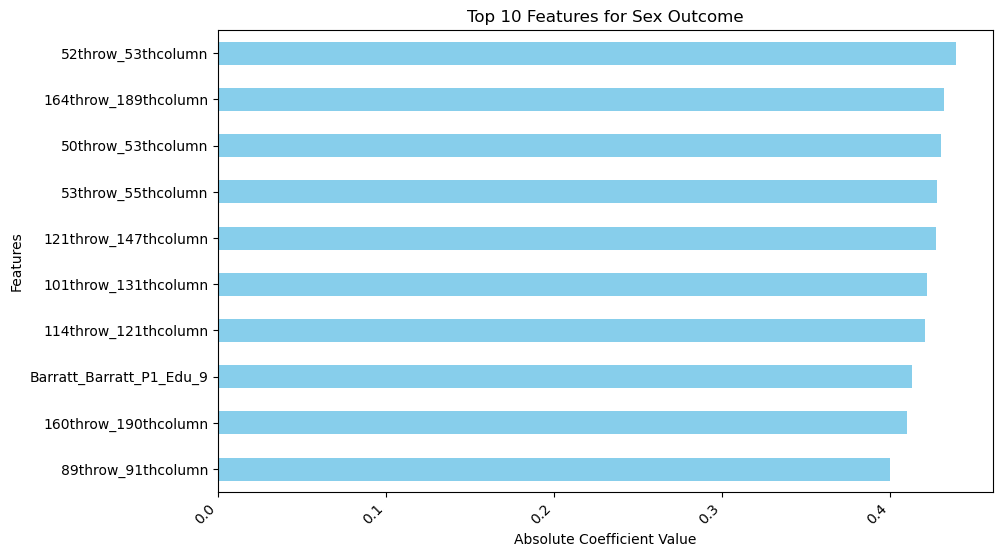

In [40]:
#Plotting the top 10 coefficents for Sex Outcome
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Features for Sex Outcome')
plt.ylabel('Features')
plt.xlabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()

**Now, we will look at Feature Selection with ADHD_Outcome as the target**

In [41]:
model = LogisticRegression(max_iter=1000)
model.fit(train_df.drop(columns='participant_id'), train_Solutions['ADHD_Outcome'])

/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [42]:
# Get coefficients for ADHD_Outcome prediction
coefficients = pd.Series(model.coef_[0], index=train_df.drop(columns='participant_id').columns)

In [43]:
# Select top features for ADHD_Outcome prediction
top_features = coefficients.abs().nlargest(10)
print(top_features)

Basic_Demos_Enroll_Year_2016          0.804691
Barratt_Barratt_P1_Occ_25             0.538087
PreInt_Demos_Fam_Child_Ethnicity_0    0.493907
Basic_Demos_Enroll_Year_2018          0.480932
SDQ_SDQ_Hyperactivity                 0.479454
MRI_Track_Scan_Location_1             0.441710
Basic_Demos_Enroll_Year_2017          0.437630
MRI_Track_Scan_Location_3             0.436085
8throw_96thcolumn                     0.410256
Barratt_Barratt_P1_Occ_35             0.375724
dtype: float64


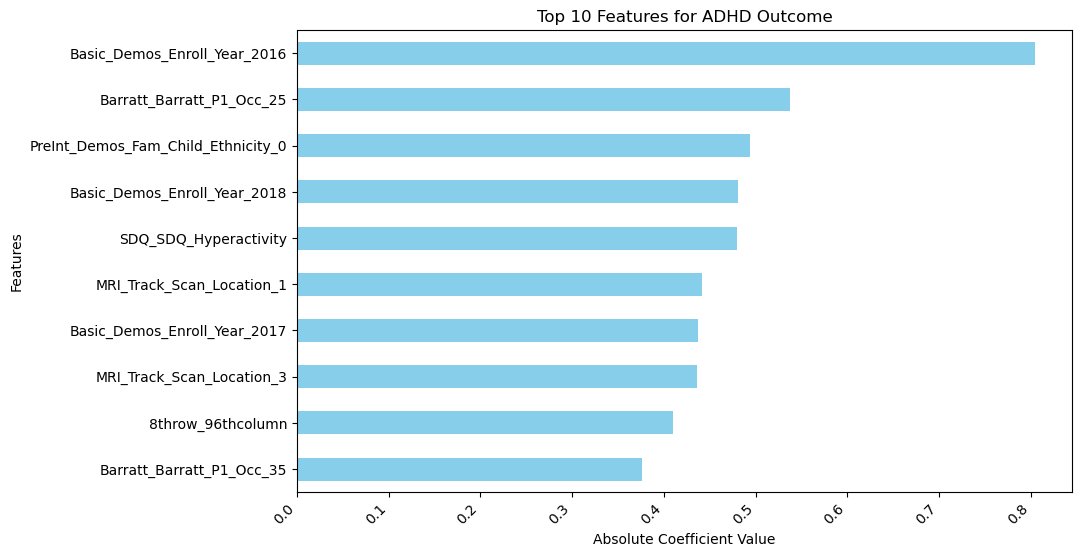

In [44]:
#Plotting the top 10 coefficents
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Features for ADHD Outcome')
plt.ylabel('Features')
plt.xlabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()

**Using L1 regularization:**
- **Use L1 penalty**: Train a logistic regression model with L1 regularization. L1 regularization tends to shrink the coefficients of less important features to zero.
- **Select non-zero features:** Choose the features with non-zero coefficients.

**We will first use L1 regularization with Sex as the target.**

In [45]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(train_df.drop(columns='participant_id'), train_Solutions['Sex_F'])

LogisticRegression(penalty='l1', solver='liblinear')

In [46]:
selected_features = train_df.drop(columns='participant_id').columns[model.coef_[0] != 0]
print(selected_features)

Index(['Basic_Demos_Enroll_Year_2017', 'Basic_Demos_Enroll_Year_2019',
       'Basic_Demos_Study_Site_1', 'Basic_Demos_Study_Site_3',
       'Basic_Demos_Study_Site_4', 'PreInt_Demos_Fam_Child_Ethnicity_0',
       'PreInt_Demos_Fam_Child_Ethnicity_1', 'PreInt_Demos_Fam_Child_Race_0',
       'PreInt_Demos_Fam_Child_Race_1', 'PreInt_Demos_Fam_Child_Race_8',
       ...
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan'],
      dtype='object', length=415)


**We will now use L1 regularization with ADHD_Outcome as the target**

In [47]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(train_df.drop(columns='participant_id'), train_Solutions['ADHD_Outcome'])

LogisticRegression(penalty='l1', solver='liblinear')

In [48]:
selected_features = train_df.drop(columns='participant_id').columns[model.coef_[0] != 0]
print(selected_features)

Index(['Basic_Demos_Enroll_Year_2016', 'Basic_Demos_Enroll_Year_2017',
       'Basic_Demos_Study_Site_3', 'Basic_Demos_Study_Site_4',
       'PreInt_Demos_Fam_Child_Ethnicity_0',
       'PreInt_Demos_Fam_Child_Ethnicity_1', 'PreInt_Demos_Fam_Child_Race_1',
       'PreInt_Demos_Fam_Child_Race_8', 'MRI_Track_Scan_Location_1',
       'MRI_Track_Scan_Location_3',
       ...
       'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan'],
      dtype='object', length=262)


## Row Selection and Reduction to Improve the Model